# Machine learning
***Definice:*** Machine Learning je aplikace Umělé Inteligence, která umožňuje se neustále učit a zlepšovat ze zkušeností, aniž by byly explicitně naprogramované. Machine Learning se zaměřuje na vývoj počítačových programů, které mohou přistoupit k datům, učit se znich a používat je pro vlastní účely. Hlavním cílem je umožnit počítačům se neustále učit, aniž by bylo potřeba lidského zásahu nebo asistence a podle toho pak upravovat své jednání.

<img src="resources/learning.jpeg">

***Proces učení začíná u dat, ve kterých se snažíme hledat vzory.***

Machine Learning lze rozdělit do několika kategorií:
- **Supervised learning**
- **Unsupervised learning**
- **Reinforcment learning**

<img src="resources/machine_learning_kinds_and_using.png">

## Supervised learning
Classification vs. Regression
## Unsupervis
ed learning
Classification vs. Clustering. 
(Classification vs. Association)
## Reinforcement Learning

## Machine learning vs. Deep learning

# Klasifikace a její algoritmy
Binary classification, Multi-classification, Multi-label.
Příklady použití klasifikace
## Logistická Regrese
U každého algoritmu bude teoretické a matematické vysvětlení a nějaký jednoduchý příklad v pythonu. Pokud je to složitý alg. tak jenom obecně vysvětlit.
## K-nearst Neighbours (K-NN)
## Suport Vector Machine (SVM)
## Naive Bayes
## Decision Tree Classification
## Random Forest Classification
# Příklad
Pokud to pujde dobře, tak můžeme dát nějaký složitější příklad.


## Naive Bayes

N. B. metody jsou souborem algoritmů s učitelem založených na aplikaci Bayesovy věty s "naivním" předpokladem podmíněné nezávislosti mezi každou dvojicí prvků vzhledem k hodnotám proměnných třídy.

#### Bayesův teorém
<img src="resources/BayesTheorem2.PNG">

Bayesův teorém popisuje pravděpodobnost, s jakou se událost stane, založená na předchozích znalostech podmínek, které se mohou týkat právě té události. Pokud například obezita souvisí s věkem, pomocí Bayesova teorému můžeme odhadnout pravděpodobnost obezity na základě věku.   


    


### Multinomial Naive Bayes
Nejčastější použítí algoritmu. Předpokládá, že výskyt či absence slova v dokumentu je nezávislý na výskytu či absenci
jakéhokoliv jiného slova. Dále také předpokládá polohovou nezávislost slov, tedy nezávislost na tom, na jaké pozici se slovo vyskytuje.

Knihovna sklearn poskytuje MultinomialNB třídu, která bude použita v příkladě.

Následující příklad se týká vyhodnocení SMS zpráv, jestli jsou SPAM nebo ne.

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [160]:
#Co je v datech?
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head(n=10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


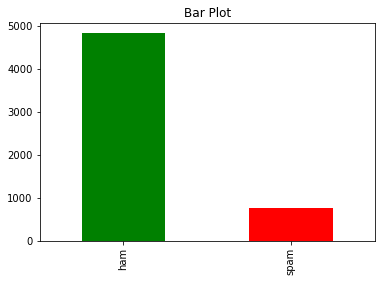

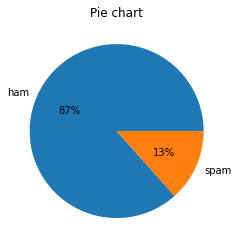

In [161]:
#Distribuce prikladu do trid
count_Class=pd.value_counts(data["v1"], sort= True)
count_Class.plot(kind = 'bar',color = ["green","red"])
plt.title('Bar Plot')
plt.show();

count_Class.plot(kind = 'pie',autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [162]:
#Dále zjistíme frekvence slov v jednotlivých třídách. Použijeme k tomu funkci Counter
count1 = Counter(" ".join(data[data['v1']=='ham']["v2"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(data[data['v1']=='spam']["v2"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})


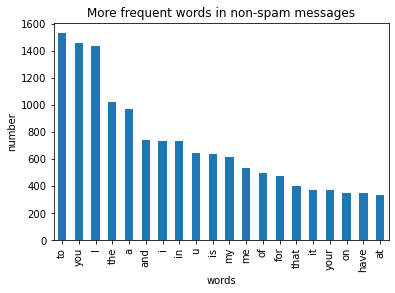

In [163]:
#Zobrazení frekvencí v HAM zprávách
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

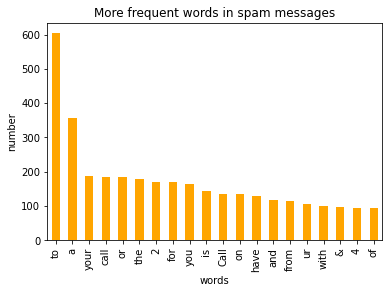

In [164]:
#Zobrazení frekvencí ve SPAM zprávách
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [165]:
#Na první pohled můžeme vidět, že nejfrekventovanější slova jsou tzv. stop words. Ta nyní odstraníme a vytvorime 
f = feature_extraction.text.TfidfVectorizer(stop_words = 'english')
X = f.fit_transform(data["v2"])

np.shape(X)
#print(X)
#X.toarray()


(5572, 8404)

In [166]:
#Nyni mame 8404 ruznych vyrazu, ktere se vyskytuji ve zpravach. Podívejme se, co je to za výrazy. 
f.get_feature_names()

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '084

In [167]:
#Mým úkolem je teď předpovědět, jestli nová zpráva spadá do SPAM či nikoliv. Určitě bude lepší, když se SPAM
# zpráva objeví mezi HAM zprávami než že HAM zpráva se nezobrazí vůbec a já si ji pak nepřečtu.

#Nejprve transformuji SPAM/HAM značku na 0 (HAM) nebo 1 (SPAM) a rozdělím dataset na trénovací a testovací část.

data["v1"]=data["v1"].map({'spam':1,'ham':0})
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['v1'], test_size=0.33, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(3733, 8404), (1839, 8404)]


In [168]:
#Nyní se konečně dostáváme k použití Multinomiálního Naive Bayes klasifikátoru. Dokonce používáme různé modely a měníme
# regulární parametr alpha.

list_alpha = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0



for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1

In [169]:
#Podívejme se na prvních 10 učících modelů a jejich hodnoty

matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,1.000000,0.973355,0.912698,0.894942
1,0.11001,0.998661,0.978249,0.920635,0.920635
2,0.22001,0.997589,0.981512,0.900794,0.961864
3,0.33001,0.994910,0.981512,0.888889,0.973913
4,0.44001,0.993571,0.978793,0.857143,0.986301
5,0.55001,0.992231,0.976074,0.829365,0.995238
6,0.66001,0.989821,0.976074,0.825397,1.000000
7,0.77001,0.985534,0.973355,0.805556,1.000000
8,0.88001,0.981248,0.968461,0.769841,1.000000
9,0.99001,0.978034,0.965742,0.750000,1.000000


In [170]:
#Zobrazíme si model s nejlepší úspěšností na testovoných datech

best_index = models['Test Precision'].idxmax()

models.iloc[best_index, :]

alpha             0.660010
Train Accuracy    0.989821
Test Accuracy     0.976074
Test Recall       0.825397
Test Precision    1.000000
Name: 6, dtype: float64

In [171]:
#Kolik modelů má ještě 100% úspěšnost?

models[models['Test Precision']==1].head(n=5)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
6,0.66001,0.989821,0.976074,0.825397,1.0
7,0.77001,0.985534,0.973355,0.805556,1.0
8,0.88001,0.981248,0.968461,0.769841,1.0
9,0.99001,0.978034,0.965742,0.750000,1.0
10,1.10001,0.975355,0.963567,0.734127,1.0


In [172]:
#Nyní si vybereme nejlepší model
best_index = models[models['Test Precision']==1]['Test Accuracy'].idxmax()
bayes = naive_bayes.MultinomialNB(alpha=list_alpha[best_index])
bayes.fit(X_train, y_train)
models.iloc[best_index, :]

alpha             0.660010
Train Accuracy    0.989821
Test Accuracy     0.976074
Test Recall       0.825397
Test Precision    1.000000
Name: 6, dtype: float64

In [173]:
#Nyní zobrazíme matici záměn
m_confusion_test = metrics.confusion_matrix(y_test, bayes.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])


,Predicted 0,Predicted 1
Actual 0,1587,0
Actual 1,44,208


### Gaussian Naive Bayes

Když se zabýváme spojitými daty, typickým předpokladem je, že spojité hodnoty spojené s každou třídou jsou distribuovány podle normálního (nebo gaussovského) rozdělení. Právě v těchto případech je vhodné pro klasifikaci použít Gaussian Naive Bayes.

Příklad se týká odhadování pravděpodobnosti, jestli si člověk s daným platem a věkem koupí věc po internetu po kliknutí na sponzorovaný odkaz.

In [135]:
# Importování potřebných knihoven
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

# Importování datasetu a jeho zobrazení
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values


dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [141]:
# Rozdělení dat na trénovací a testovací data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Transformace dat

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [144]:
# Použití Gaussovského Naive Bayes

classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Vytvoření matice záměny
cm = confusion_matrix(y_test, y_test)

X_set, y_set = X_train, y_train

print(cm)

[[68  0]
 [ 0 32]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


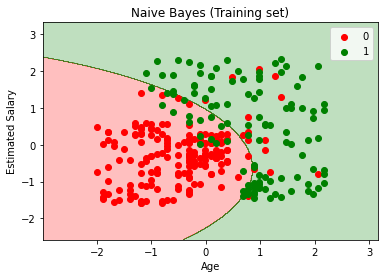

In [146]:
# Vizualizace tréninkových dat

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


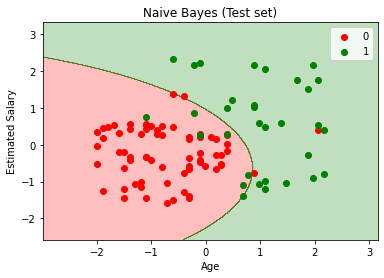

In [148]:
# Vizualizace testovaných dat
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [149]:
# Zobrazit počet špatně predikovaných výsledků 
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 75 points : 4


## Decision Tree Classification

#### Classification And Regression Tree (CART) analysis
Termín CART se používá jako nadřazený pojem regresivních a klasifikačních stromů. 

<b>Klasifikační stromy</b> se snaží odhadnout třídu, do které objekt patří. Např. Muž/Žena, Ovoce/Zelenina, Ano/Ne, ...

<b>Regresivní stromy </b> dávají výsledek v podobě nějakého reálného čísla. Např. váha člověka, cena domu, ...

Rozhodovací strom je mnohoúrovňová struktura, kde každá úroveň obsahuje uzly. Tyto uzly jsou hranou spojeny s právě jedním dalším uzlem. Nejspodnější uzly jsou pak třídy, do kterých zkoumané objekty patří.

<img src="resources/decisionTreeRes.png">

<img src="resources/decisionTree2.png">

#### Výhody
    - Jednoduché na pochopení a  interpretaci (např. obrázkové)
    - Data se nemusejí téměř nijak upravovat. Některé jiné techniky vyžadují normalizaci dat, "dummy" proměnné, odstranění prázdných proměnných
    - Logaritmická časová složitost
    - Zvládne pracovat s kategorickými i číselnými daty.
#### Nevýhody
    - Občas může nastat nežádoucí komplexita rozhodovacího stromu ("overfitting") - řešeno pomocí maximální hloubky stromu
    - Stromy mohou bý nestálé kvůli malému rozílu mezi jednotlivými třídami
    - Automaticky navrhované algoritmy negarantují nejepší výsledek
    - Doporučuje se mít vyrovnaně velké třídy dat. 

### Jak algoritmus pracuje?

1. Výběr "nejlepšího" atributu pro dělení prvků pomocí Attribute Selection Measures (ASM)
2. Vytvoření rozhodovacího uzlu z tohoto atributu a rozdělení datasetu na menší části
3. Budování stromu opakování výše zmíněných bodů rekurzivně pro každou vytvořenou část do bodu kdy bude splněna jedna z následujících podmínek: 
    - Všechny "body" v každé části patří do stejné třídy
    - Nezbývají žádné další atributy
    - Nezbývají žádné další instance
    
## Decision Tree Classification

#### Classification And Regression Tree (CART) analysis
Termín CART se používá jako nadřazený pojem regresivních a klasifikačních stromů. 

<b>Klasifikační stromy</b> se snaží odhadnout třídu, do které objekt patří. Např. Muž/Žena, Ovoce/Zelenina, Ano/Ne, ...

<b>Regresivní stromy </b> dávají výsledek v podobě nějakého reálného čísla. Např. váha člověka, cena domu, ...

Rozhodovací strom je mnohoúrovňová struktura, kde každá úroveň obsahuje uzly. Tyto uzly jsou hranou spojeny s právě jedním dalším uzlem. Nejspodnější uzly jsou pak třídy, do kterých zkoumané objekty patří.

<img src="resources/decisionTreeRes.png">

<img src="resources/decisionTree2.png">

#### Výhody
    - Jednoduché na pochopení a  interpretaci (např. obrázkové)
    - Data se nemusejí téměř nijak upravovat. Některé jiné techniky vyžadují normalizaci dat, "dummy" proměnné, odstranění prázdných proměnných
    - Logaritmická časová složitost
    - Zvládne pracovat s kategorickými i číselnými daty.
#### Nevýhody
    - Občas může nastat nežádoucí komplexita rozhodovacího stromu ("overfitting") - řešeno pomocí maximální hloubky stromu
    - Stromy mohou bý nestálé kvůli malému rozílu mezi jednotlivými třídami
    - Automaticky navrhované algoritmy negarantují nejepší výsledek
    - Doporučuje se mít vyrovnaně velké třídy dat. 

### Jak algoritmus pracuje?

1. Výběr "nejlepšího" atributu pro dělení prvků pomocí Attribute Selection Measures (ASM)
2. Vytvoření rozhodovacího uzlu z tohoto atributu a rozdělení datasetu na menší části
3. Budování stromu opakování výše zmíněných bodů rekurzivně pro každou vytvořenou část do bodu kdy bude splněna jedna z následujících podmínek: 
    - Všechny "body" v každé části patří do stejné třídy
    - Nezbývají žádné další atributy
    - Nezbývají žádné další instance
    
<img src="resources/DecisionTreeAlgorithm.jpg">


Následující příklad se týká odhadnutí hrozby cukrovky na řadě zdravotních indicií jako je hodnota glokósy v krvi, BMI, věk atd. 



In [195]:
# Import
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

#možná potřebná instalace 
# pip install graphviz
# pip install pydotplus
# pip install six



ModuleNotFoundError: No module named 'sklearn.externals.six'

In [182]:
# Načtení dat

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [183]:
# Rozdělení datasetu na vlastnosti (features) a cíle (targets)

feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [184]:
# Rozdělení dat na trénovací a testovací

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [198]:
# Vytváření modelu rozhodovacího stromu

clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

#Předpověď testovacího datasetu
y_pred = clf.predict(X_test)

In [199]:
# Vytisknutí pravděpodobnosti uhádnutí. Výsledek by se dal poladit množstvím parametrů v modelu rozhodovacího stromu.
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.683982683982684


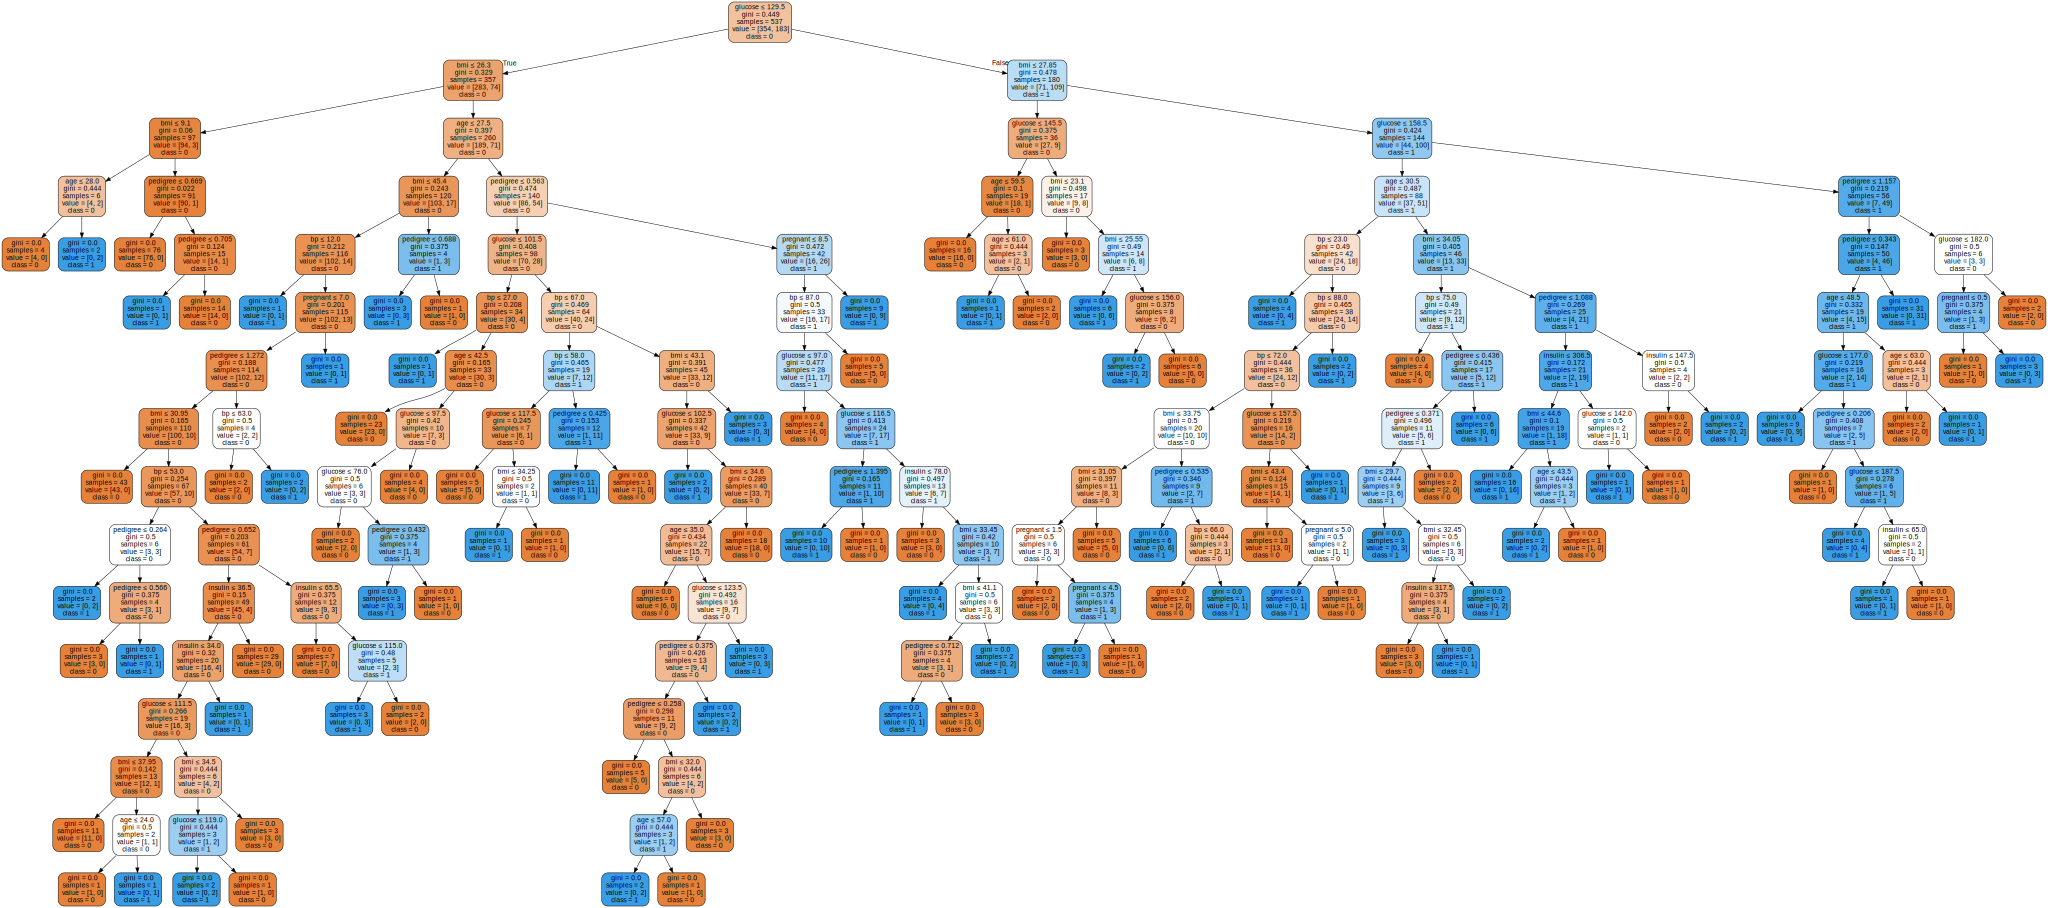

In [204]:
# Vizualizace rozhodovacího stromu

dot_data = tree.export_graphviz(
    clf
    , out_file=None
    , filled=True
    , rounded=True
    , special_characters=True
    , feature_names = feature_cols
    , class_names = ['0','1'])

graph = graphviz.Source(dot_data)  

graph





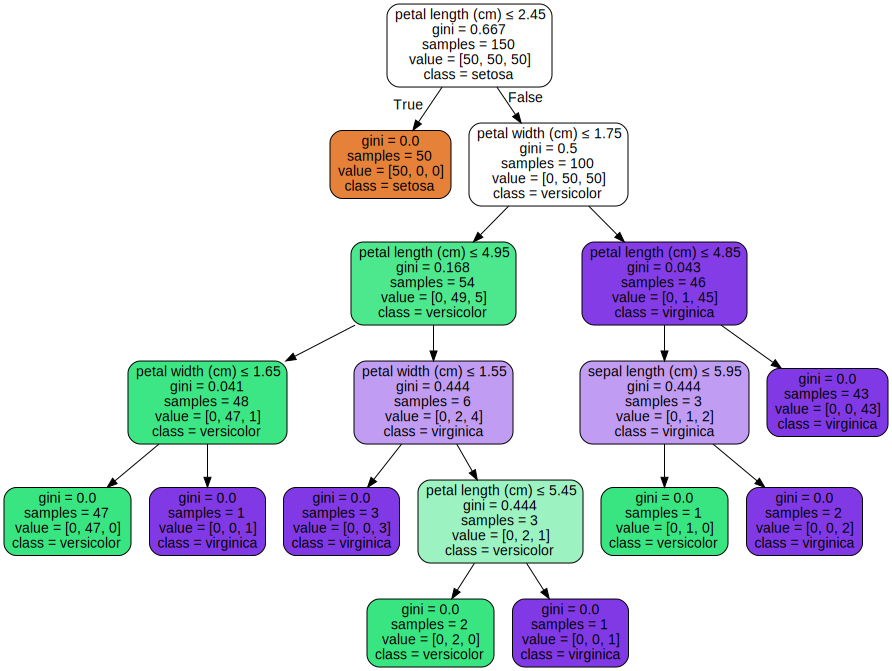

In [150]:
# Implementace knihoven
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz


iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  



graph  



## Random Forest Classification

Jedná se o jeden nejpopulárnějších a nejsilnějších algoritmů v ML. Používá se i v regresi, avšak klasifikace je častější. Jak název napovídá, jedná se o shluk rozhodovacích stromů. Říká se, že čím více stromů obsahuje, tím více je les robustnější. Les vytváří rozhodovací stromy na základě náhodně vybraných vzorků z datasetu. Vypočítá pradikce pro každý strom zvlášť a vybere nejlepší řešení.

Použití algoritmu je velmi jednoduché a snadno se dá přizpůsobit datům. 

#### Výhody
    - Hodí se pro klasifikační i regresivní úlohy
    - Zvládá dobrou predikci i pro prvky s chybějícími hodnoty
    - Zvládá velké množství dat s více atributy
    - Jsou považovány za velice přesnou a robustní metodu díky množství rozhodovacích stromů, které se podílejí na výsledku.
    - Netrpí "overfittingem"
    
#### Nevýhody
    - Ne tak dobrý pro regresy
    - Malá kontrola nad modelem
    - Oproti rozhodovacím stromům složitý na vizualizaci
    - Výpočetně daleko náročnejší než rozhodovací stromy
    
### Využití
    - Bankovní sektor (analýza klientů)
    - Medicína (správná kombinace účinných látek v léčivech, předvídání náchylnosti k nemocem)
    - Finanční sektor (předvídání zisku/ztrát, nákupy akcií,..)
    - E-commerce (cílená reklama)
    - Image, Voice Classification (Xbox kinect)
    
### Jak algoritmus funguje? 
1. Náhodný výběr vzorků z testovacího datasetu
2. Vytvoření rozhodovacího stromu pro každý vzorek a výpočet predikcí pro každý takto vytvořený strom
3. Na základě predikcí volí každá struktura výsledek
4. Výběr třídy s nejvíce hlasy

<img src="resources/RandomForestClassificationAlgorithm.jpg">

### Hledání důležitých atributů
Lesy také nabízejí výbornou indikaci klíčových atributů. Scikit-learn knihovna přímo poskytuje extra proměnnou modelu, která poskytuje relativní důležitost pro každou vlastnost v predikci výsledků. Tato proměnná automaticky počítá relevanční skóre pro každý atribut během trénovací fáze. Součet skóre pro všechny atributy je roven 1.

Skóre velmi usnadní výběr těch nejdůležitějších atributů a odhalí i ty, které jsou méně podstatné pro predikci výsledků.


Příklad se bude týkat známého datasetu iris.
    
    


In [231]:
# Import knihoven a load datasetu
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

iris = datasets.load_iris()

In [232]:
# Nyní si zobrazíme targets a atributy (features)

print(iris.target_names)

print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [233]:
# Vytvoření DataFramu

data = pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [234]:
# Následuje rozdělení sloupců na závislé atributy a targety

X = data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y = data['species']  # Targets

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 70% training and 30% test

In [235]:
# Vytvoření klasifikátoru a jeho trénink

clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [236]:
# Nyní si zobrazíme přesnost predikce

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


In [237]:
# Predikce pro manuální zadání dat

clf.predict([[3, 5, 4, 2]])

array([2])

No handles with labels found to put in legend.


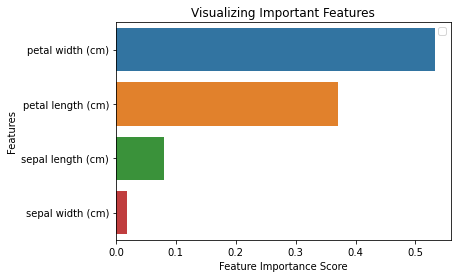

In [238]:
# Nyní se pokusíme nalézt důležité atributy určující druh rostlin.

# Musíme si tedy vypočítat tzv. skóre pro jednotlivé atributy.
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp


# Vytvoření barplotu
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [239]:
# Nyní odstraníme z modelu atribut "sepal width", který je nejméně relevantním atributem.

X = data[['petal length', 'petal width','sepal length']]  # Removed feature "sepal length"
y = data['species']                

# Dělení datasetu na trénovací a testovací část
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

# Po dělení znovu vygenerujeme model a zobrazíme úspěšnost predikce
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9523809523809523


In [ ]:
Zdroje:
    https://www.datacamp.com/community/tutorials/decision-tree-classification-python
    https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py
    https://arun-aiml.blogspot.com/2017/06/welcome-to-aimldl.html
        
        